# Exercise 2.
$$U = U_{att} + U_{rep}$$
a) 
$$C \subset \mathbb{R}^{2}$$
$$q_{start} = (0,0)$$
$$q_{goal} = (10,0)$$
$$\epsilon = 0.25 \text{ centered at } q_{goal}$$
Obstacles are two squares with side length 1 centered at (4,1) and (7,-1)

In [152]:
%run Exc2utils.py

In [153]:
X,Y,U,V = get_vectorfield()

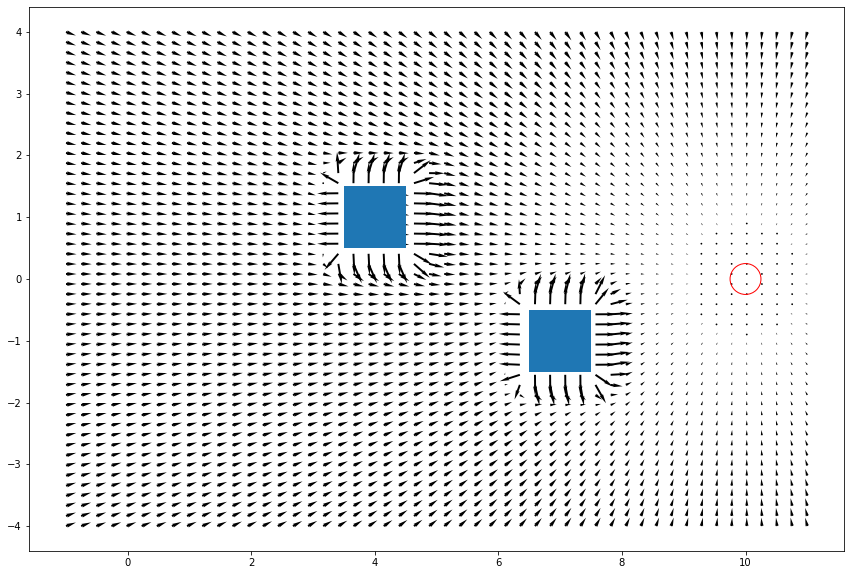

In [160]:
plot_vectorfield(X,Y,U,V)
plt.show()

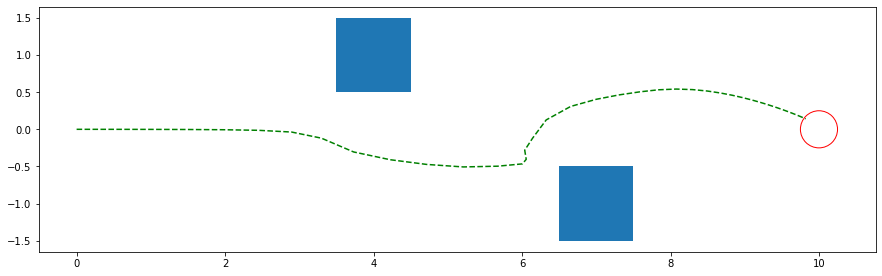

In [159]:
path,_ = get_path()
plot_path(path)
plt.show()

In [12]:
qgoal = np.array([10,0])
x,y = np.linspace(0,20),np.linspace(0,20)
grid = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        grid[i,j] = Uattr((x[i],y[j]), qgoal)

Text(0.5, 0, 'z')

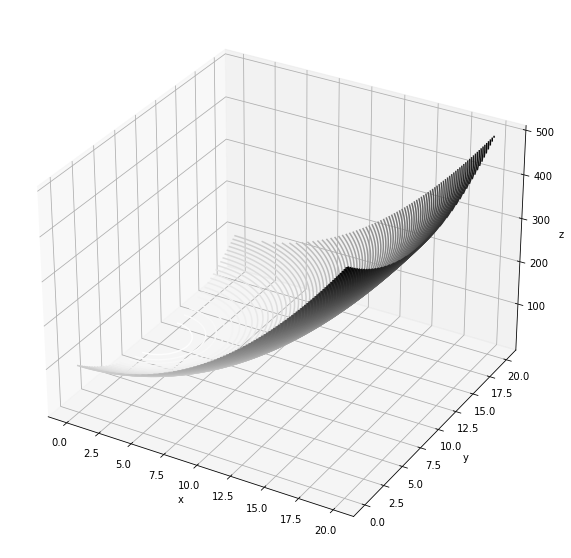

In [16]:
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, grid, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [21]:
grad_u = np.zeros((len(x),len(y)))
grad_v = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        grad_u[j,i],grad_v[j,i] = Uattr_grad((x[i],y[j]), qgoal)

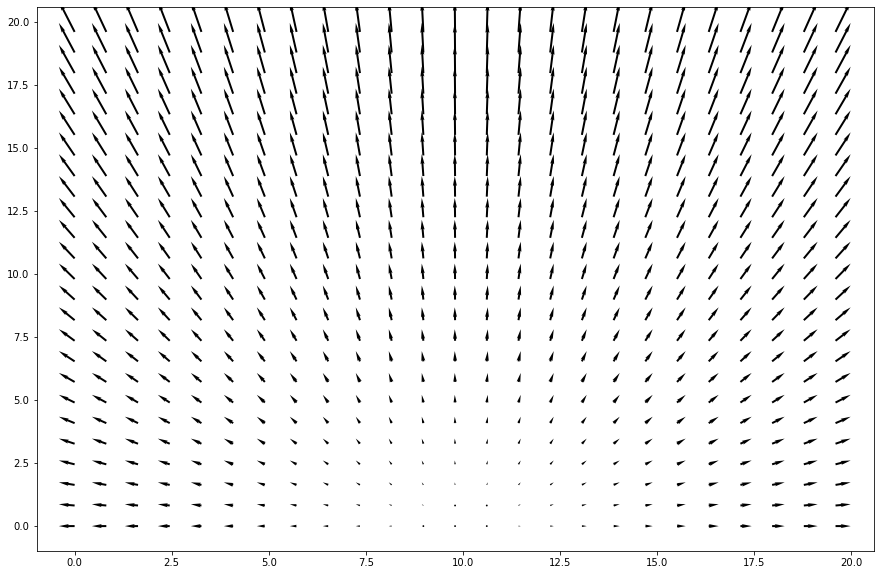

In [25]:
plt.figure(figsize=(15,10))
plt.quiver(X[::2,::2],Y[::2,::2],grad_u[::2,::2],grad_v[::2,::2], headwidth=2)

In [139]:
X[0,1]

3.020100502512563

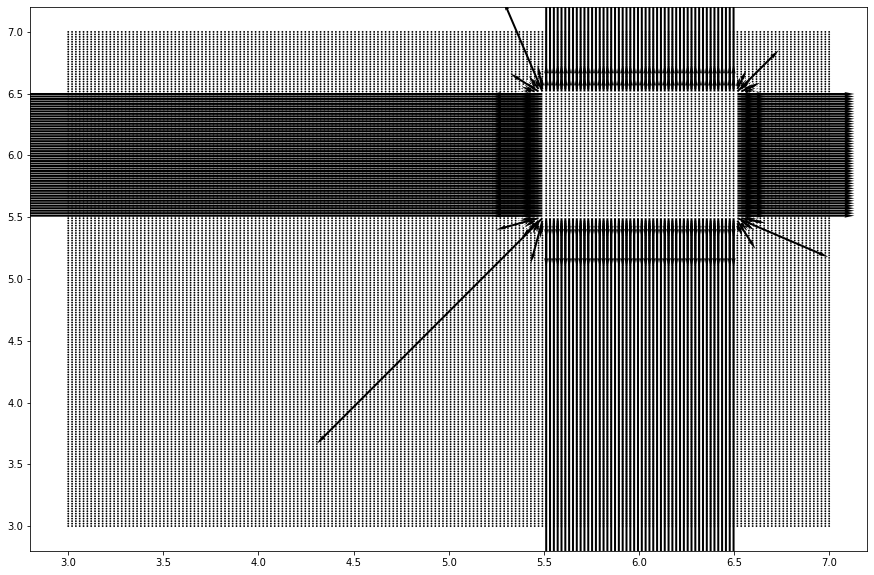

In [142]:
X,Y = np.meshgrid(np.linspace(3,7,200),np.linspace(3,7,200))

grad_u = np.zeros((len(X),len(Y)))
grad_v = np.zeros((len(X),len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        grad_u[j,i],grad_v[j,i] = Urep_grad((X[0,i],Y[j,0]), np.array([6,6]), 3, 5)
        
plt.figure(figsize=(15,10))
plt.quiver(X,Y,grad_u,grad_v, headwidth=2)

(1.0, 500.0)

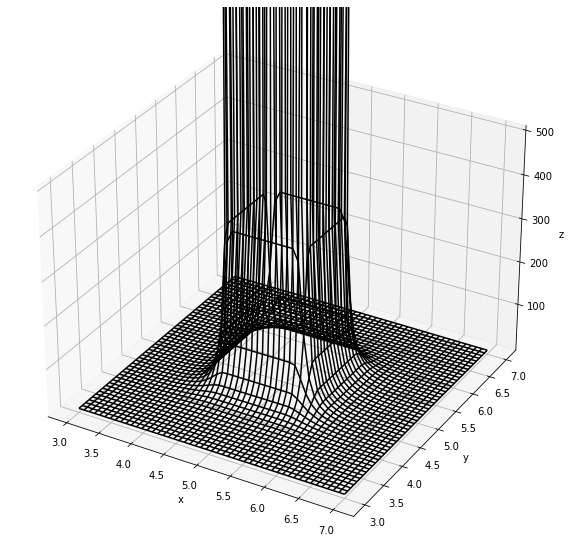

In [84]:
x,y = np.linspace(3,7),np.linspace(3,7)
grid = np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        grid[j,i] = Urep((x[i],y[j]), np.array([5,5]),10,3)

grid[grid == 0] = grid.max()
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, grid, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim([1,500])

In [198]:
q = np.array([7,0])
qgoal = np.array([10,0])
Uatt_grad(q,qgoal)

array([-3,  0])

In [101]:
qobs1 = np.array([4,1])
qobs2 = np.array([7,-1])
qgoal = np.array([10,0])
xlim = [-1,11]
ylim = [-4,4]
eta = 1
Q_star = 1
N = 50

X,Y,Uobs1,Vobs1 = Urep_grad_grid(qobs1, eta=eta, Q_star=Q_star,xlim=xlim,ylim=ylim, N=N)
_,_,Uobs2,Vobs2 = Urep_grad_grid(qobs2, eta=eta, Q_star=Q_star,xlim=xlim,ylim=ylim, N=N)
_,_, Ua, Va = Uatt_grad_grid(qgoal,xlim,ylim,N)
Utot = Uobs1 + Uobs2 + Ua
Vtot = Vobs1 + Vobs2 + Va

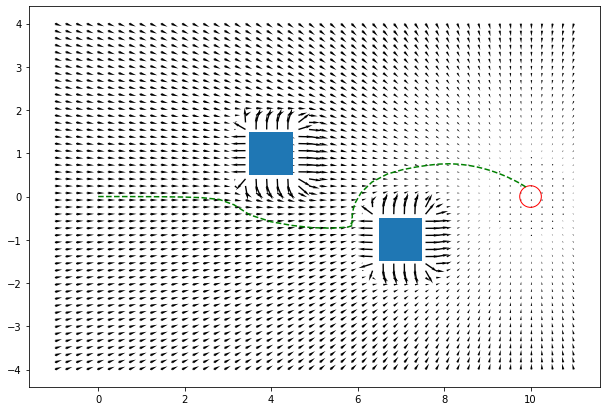

In [110]:
fig, ax = plt.subplots(figsize=(12,7))
thresh = 10
weight_map = thresh/np.sqrt(np.square(Utot) + np.square(Vtot))
weight_map[weight_map > 1] = 1
ax.quiver(X,Y,-Utot*weight_map,-Vtot*weight_map, headwidth=2)
ax.plot(*pos_list.T, 'g--')
ax.add_patch(Rectangle(qobs1-0.5,1,1))
ax.add_patch(Rectangle(qobs2-0.5,1,1))
ax.add_patch(Circle((10,0),0.25,fill=False, ec='red'))
ax.set_aspect(1)

In [86]:
q0 = np.array([0,0], dtype=np.float64)
qobs1 = np.array([4,1])
qobs2 = np.array([7,-1])
qgoal = np.array([10,0])
eta = 0.2
Q_star = 5
z = 0.1
d_star = 5

q = q0.copy()
pos_list = q0.copy()
for i in range(50):
    Utot_grad = Uatt_grad(q,qgoal,d_star,z) + Urep_grad(q, qobs1, eta, Q_star) + Urep_grad(q, qobs2, eta, Q_star)
    q -= Utot_grad
    pos_list = np.vstack((pos_list,q))

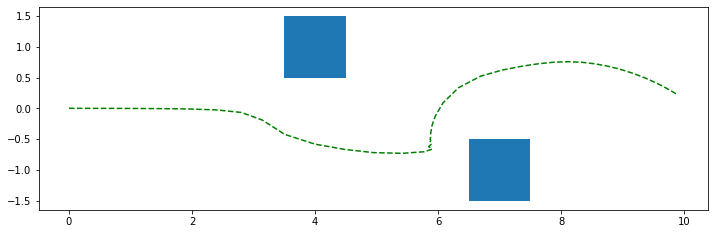

In [111]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(*pos_list.T, 'g--')
ax.add_patch(Rectangle(qobs1-0.5,1,1))
ax.add_patch(Rectangle(qobs2-0.5,1,1))
ax.set_aspect(1)

In [76]:
Urep_grad(np.array([2,1]),np.array([2,2]),1,1)

array([-0., -2.])

In [132]:
path,length = get_path()

10.39821847174276


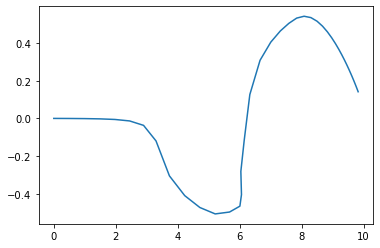

In [133]:
plt.plot(*path.T)
print(length)